Source:: https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm

# Importing packages

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Loading data

In [110]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url)
abalone.head()

#Since sex is not a purely physical measure, you should remove it from the dataset. 

abalone = abalone.drop("M",axis=1)
abalone.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


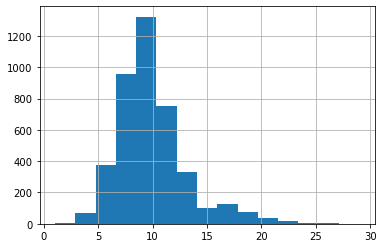

In [111]:
abalone["15"].hist(bins=15)
plt.show()

# Split Train/Test data

In [112]:
X = abalone.drop("15", axis=1)
X = X.values

y = abalone["15"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

<IPython.core.display.Javascript object>

# Data scaling

In [113]:
#Feature scaling is essential for machine learning algorithms that calculate distances between data. 
##If not scale, the feature with a higher value range starts dominating when calculating distances

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#model.fit() performs the training, 
##model.transform() changes the data in the pipeline in order to pass it on to the next stage in the pipeline

# Apply Regression & then do the Prediction

In [114]:
param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']}
gridsearch = GridSearchCV(KNeighborsRegressor(), param_grid)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [115]:
gridsearch.best_score_

0.528655744996187

In [116]:
best_model = KNeighborsRegressor(n_neighbors=21, weights='uniform')
best_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21)

In [117]:
# Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.

train_preds_grid = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
display(train_rmse)


test_preds_grid = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
display(test_rmse)

2.1062831014697774

2.171417354161927